**모델의 성능 향상시키기**
1. 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [5]:
# 학습셋과 테스트셋
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [6]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 2s 42ms/step - loss: 0.6202 - accuracy: 0.7670 - val_loss: 0.4616 - val_accuracy: 0.7638
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3518 - accuracy: 0.8645 - val_loss: 0.3205 - val_accuracy: 0.8823
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2931 - accuracy: 0.9022 - val_loss: 0.2842 - val_accuracy: 0.9046
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2567 - accuracy: 0.9179 - val_loss: 0.2657 - val_accuracy: 0.9100
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2471 - accuracy: 0.9215 - val_loss: 0.2559 - val_accuracy: 0.9100
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2389 - accuracy: 0.9210 - val_loss: 0.2516 - val_accuracy: 0.9146
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2325 - accuracy: 0.9251 - val_loss: 0.2452 - val_accuracy: 0.9131
Epoch 8/50
8/8 [================

In [9]:
# 테스트 결과
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9646
Test accuracy:  0.9646154046058655


2. 모델 업데이트하기  
기본 코드 불러오기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header=None)

In [14]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [16]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

모델의 저장 설정 및 실행

In [18]:
# 모델 저장 조건 설정
modelpath = './data/model/all/{epoch:02d}--{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [19]:
# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01--0.7646.hdf5

Epoch 2: saving model to ./data/model/all/02--0.8877.hdf5

Epoch 3: saving model to ./data/model/all/03--0.8831.hdf5

Epoch 4: saving model to ./data/model/all/04--0.9208.hdf5

Epoch 5: saving model to ./data/model/all/05--0.9185.hdf5

Epoch 6: saving model to ./data/model/all/06--0.9331.hdf5

Epoch 7: saving model to ./data/model/all/07--0.9315.hdf5

Epoch 8: saving model to ./data/model/all/08--0.9323.hdf5

Epoch 9: saving model to ./data/model/all/09--0.9392.hdf5

Epoch 10: saving model to ./data/model/all/10--0.9431.hdf5

Epoch 11: saving model to ./data/model/all/11--0.9446.hdf5

Epoch 12: saving model to ./data/model/all/12--0.9454.hdf5

Epoch 13: saving model to ./data/model/all/13--0.9469.hdf5

Epoch 14: saving model to ./data/model/all/14--0.9446.hdf5

Epoch 15: saving model to ./data/model/all/15--0.9477.hdf5

Epoch 16: saving model to ./data/model/all/16--0.9462.hdf5

Epoch 17: saving model to ./data/model/all/17--0

In [20]:
# 테스트 결과
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9546
Test accuracy:  0.9546154141426086


3. 그래프로 과적합 확인하기

In [21]:
# 그래프 확인을 위한 긴 학습
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1205 - accuracy: 0.9564 - val_loss: 0.1120 - val_accuracy: 0.9608
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1201 - accuracy: 0.9577 - val_loss: 0.1108 - val_accuracy: 0.9569
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.1201 - accuracy: 0.9561 - val_loss: 0.1111 - val_accuracy: 0.9577
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1176 - accuracy: 0.9574 - val_loss: 0.1095 - val_accuracy: 0.9600
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1167 - accuracy: 0.9592 - val_loss: 0.1085 - val_accuracy: 0.9592
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1154 - accuracy: 0.9592 - val_loss: 0.1081 - val_accuracy: 0.9646
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1145 - accuracy: 0.9610 - val_loss: 0.1073 - val_accuracy: 0.9600
Epoch 8/2000
8/8 [

In [22]:
# history에 저장된 학습 결과 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.120503,0.956377,0.112045,0.960769
1,0.120124,0.957660,0.110785,0.956923
2,0.120083,0.956120,0.111061,0.957692
3,0.117623,0.957403,0.109453,0.960000
4,0.116707,0.959199,0.108498,0.959231
...,...,...,...,...
1995,0.024582,0.992045,0.027869,0.992308
1996,0.023366,0.992815,0.028160,0.992308
1997,0.023347,0.992302,0.027205,0.992308
1998,0.023469,0.993585,0.028630,0.990769


In [23]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장
y_vloss = hist_df['val_loss']

In [24]:
# y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']

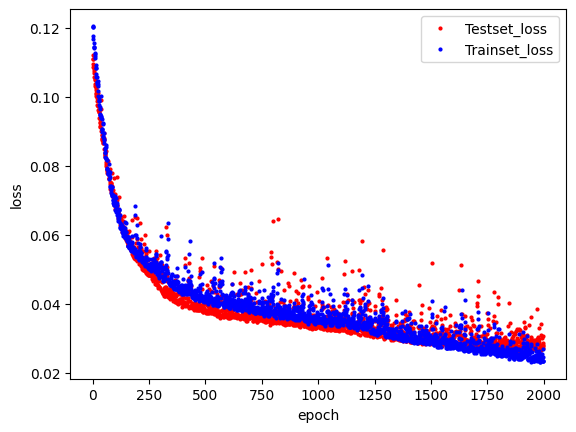

In [25]:
# x 값을 지정하고 테스트셋의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

4. 학습의 자동중단

학습의 자동 중단 및 최적화 모델 저장

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [28]:
# 학습이 언제 자동 중단될지를 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [29]:
# 최적화 모델이 저장될 폴더와 모델의 이름 정하기
modelpath = './data/model/bestmodel.hdf5'

In [30]:
# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [32]:
# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 25ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0282 - val_accuracy: 0.9915
Epoch 2/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 3/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0300 - val_accuracy: 0.9923
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0295 - val_accuracy: 0.9931
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0259 - accuracy: 0.9908 - val_loss: 0.0307 - val_accuracy: 0.9931
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0286 - val_accuracy: 0.9900
Epoch 7/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0249 - accuracy: 0.9928 - val_loss: 0.0275 - val_accuracy: 0.9900
Epoch 8/2000
8

In [33]:
# 테스트 결과
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9831
Test accuracy:  0.9830769300460815
